# 文本数据处理
事情无论巨细，往往存在一个准备阶段。比如做饭炒菜，需要择菜、洗菜、切菜、热锅等准备工作；出远门需要整理好身份证、手机、钱包等随身物品。类似地，在处理文本的任务中，也存在预处理这么一个重要阶段，包括诸如统一数据格式、去噪、词形还原、分词之类的基本操作，以及语义分析、关键词提取、对于数据不平衡的处理等更进一步的精细处理。

知识点
正则表达式
分词
词性标注
词干提取与词形还原
命名实体识别
文本的数据增强

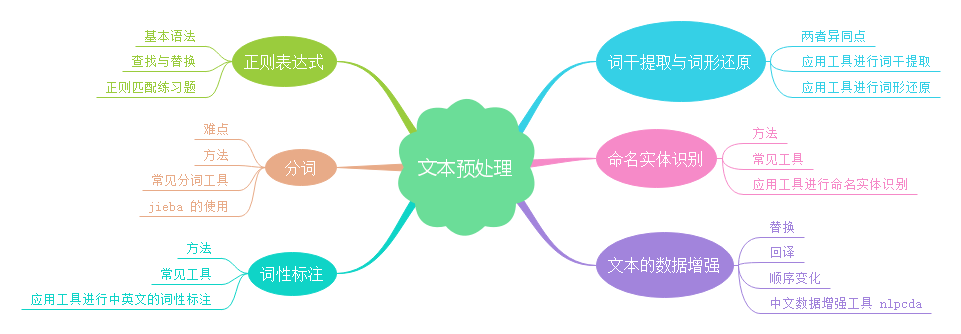
假设有一天，你的上司给你几百个 txt 文本，并且布置了一个任务，找出文本中所有出现的身份证号以及电话号码，并且要求在一个小时内完成。这时候该怎么办呢？总不可能肉眼一个个地去找吧，太费时了！在这里，正则表达式就派上用场了。学会了正则表达式，你就能在 20 分钟内完成此任务。

正则表达式，又称规则表达式，英语称为 Regular Expression，通常被用来检索、替换那些符合某个模式 (规则) 的文本，例如在以上任务中匹配身份证号或者电话号码，是在文本预处理过程中常用的技术。

那么，正则表达式怎么写呢？在这之前，让我们首先来熟悉一些基本的正则表达式的语法：

. ：能够匹配除换行符 \n 以外的任意单个字符。

\w ：与单个字母数字字符匹配。 

\W ：与单个非字母数字字符匹配。 

\d ：与单个数字匹配。

\D ：与单个非数字匹配。

\s ：与单个空格字符（空格，换行符，返回符，制表符，表格）匹配。

\S ：与任何非空格字符匹配。

\t ：匹配单个 tab 符。

\n ：匹配单个换行符。

\r ：匹配单个回车符。

^ 和 $ ：分别匹配字符串的开头或结尾。

[..] ：匹配方括号中..表达的字符。

[^..] ：匹配方括号中..表达以外的任何字符。

{m，n} ：匹配前一个字符的出现次数在 m 至 n 次之间。

a|b ：匹配 a 或 b。

？：匹配前一个字符出现次数 0 或 1。

+：模式前一个字符出现 1 次或多次。

*：模式前一个字符出现 0 次或多次。

\ ：转义字符，通常用于将一些被占用成为正则表达的符号还原为原来的意思，比如 \+ 表示加号。

（）：被括起来的表达式部分将作为分组，并返回相匹配的文本。

如果是第一次接触正则表达式的朋友，可能会觉得这些语法有些难记有些抽像，并且难以理解，这是正常现象，不必担心。事实上，我们通过一些代码示例及练习，便可以快速地在实践中学会灵活使用正则表达式。而在 Python 中，通过内嵌集成 re 模块，我们可以直接调用从而快速实现正则匹配，re 中常用的功能有：

re.match()：从字符串中的首字符开始匹配相应的模式串。
re.search()：从字符串中的任意位置都可以匹配相应的模式串，只要找到第一个匹配即返回，如果字符串没有匹配，则返回 None。
re.findall()：从字符串中的任意位置都可以匹配相应的模式串，找到所有匹配情况后返回，如果字符串没有匹配，则返回 None。
re.sub()：从字符串中的任意位置都可以匹配相应的模式串，找到所有匹配情况后替换成希望的表达形式，返回替换后的字符串。
注：这里的“模式串”，英文称为 pattern，指的便是使用正则语法所构成的一种表达式。

接下来分别就 re.match()，re.search()，re.findall() 做一些简单的代码演示，同学们可以观察结果，深入理解这三者的区别。

In [1]:
import re
# r'自然语言'指模式串，'自然语言处理'指要被匹配的字符串
# 注：模式串前加 r 是为了防止字符转义
result = re.match(r'自然语言', '自然语言处理')
print(result)  # 匹配成功返回一个匹配的对象，否则返回 None

<re.Match object; span=(0, 4), match='自然语言'>


基于不同函数获取结果的不同部分：

In [2]:
print('Matching string :', result.group())  # 获取被匹配到的部分
print('Starting position of the match :', result.start())  # 获取被匹配到的部分初始位置
print('Ending position of the match :', result.end())  # 获取被匹配到的部分结束位置

# 4是不取的，3的下一个

Matching string : 自然语言
Starting position of the match : 0
Ending position of the match : 4


In [3]:
result = re.match(r'语言', '自然语言处理')  # 注意 match 需要从首字符开始匹配
print(result)  # 匹配成功返回一个匹配的对象，否则返回 None

None


In [4]:
# 搜寻字符串中任意位置都可能匹配的模式串，找到首个即返回
result = re.search(r'语言', '自然语言处理自然语言')
print(result)  # 匹配成功返回一个匹配的对象，否则返回 None
print('Matching string :', result.group())  # 获取被匹配到的部分

<re.Match object; span=(2, 4), match='语言'>
Matching string : 语言


In [5]:
# 搜寻字符串中任意位置都可能匹配的模式串，遍历匹配，可以获取字符串中所有匹配的字符串，
result = re.findall(r'语言', '自然语言处理自然语言')
print(result)  # 返回一个列表

['语言', '语言']


在这里总结一下 re.match() , re.search() 以及 re.findall() 之间的区别：

re.match() 只从字符串的开始位置进行匹配，如果字符串不符合正则表达式，则匹配失败，函数返回 None；
re.search() 匹配整个字符串，从任意位置都可以开始匹配，直到找到一个匹配即返回；
re.findall() 则会找到所有匹配结果并返回。
如果想替换字符串中的符合某些模式的地方，可以使用 re.sub()：

In [6]:
# r'自然语言'指模式串，'language'指替换内容，'自然语言处理'指要被匹配的字符串
result = re.sub(r'语言', 'language', '自然语言处理语言')
print(result)

自然language处理language


通过以上简单的例子，我们熟悉了 re 模块中一些常用函数的功能，接下来增加难度，尝试用更复杂的正则表达式语法规则来解决一些实际问题。

题目：抽取一段英文中的首个单词。

In [9]:
# 使用了模式串 r'^\w+'，这是因为 ^ 表示字符串的开始部分，而 \w+ 可以表示多个连续的字母。
result = re.findall(r'^\w+', 'Whatever is worth doing is worth doing well.')
print(result)

['Whatever']


题目：返回邮箱地址中的域名。

In [15]:
# r'@\w+\.(\w+)' 中最后的 \w+ 左右加了括号，因此只会返回括号中匹配的部分
# . 能够匹配除换行符 \n 以外的任意单个字符，这里需要匹配原本的 . 所以加上转义字符变为 \.
result = re.findall(
    r'@\w+\.(\w+)', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
print(result)

['com', 'in', 'com', 'biz']


题目：返回字符串中固定格式的日期，如 11-09-2020。

In [16]:
# \d{2}表示两个数字，同理得表达式为 r'\d{2}-\d{2}-\d{4}'
result = re.findall(
    r'\d{2}-\d{2}-\d{4}', 'Amit 34-3456 12-05-2007, XYZ 56-4532 11-11-2011, ABC 67-8945 12-01-2009')
print(result)

['12-05-2007', '11-11-2011', '12-01-2009']


题目：只保留字符串中的中文字符。

In [18]:
# 中文的 Unicode 范围为 \u4e00-\u9fa5，前面加 ^ 表示非汉字
# 注意 ^ 放在 [] 中才表示“非”的意义，而放在外面则表示“初始位置”的意义
result = re.sub(r'[^\u4e00-\u9fa5]', '', 'language 自然!!·~语言##处理；’;')
print(result)  # 将非汉字的内容使用" "替代

自然语言处理


题目：验证是否为身份证号码。
注：身份证号可能为 15 或 18 位，15 位全为数字，18 位中前 17 位为数字，最后一位为 X 或者 x。

In [19]:
# r'(^\d{15}$)|(^\d{18}$)|(^\d{17}(X|x)$)' 中三个大括号中的表达式分别对应以上三种情况
# 一头一尾的 ^ 以及 $ 表明匹配的范围是字符串的起止范围
result = re.match(
    r'(^\d{15}$)|(^\d{18}$)|(^\d{17}(X|x)$)', '94023856739300998X')
print(result)

<re.Match object; span=(0, 18), match='94023856739300998X'>


经过了以上例子的学习，同学们是不是对正则表达式多了一些理解了呢。大家在学习正则表达式的时候，一定要多加练习，多实践，多跑跑代码，效果比单纯地记忆各种正则表达式语法好多了。

# 分词
分词是自然语言处理中的重要步骤，也就是将句⼦、段落、⽂章这种⻓⽂本，分解为以词为基本单位的数据结构，⽅便后续的处理分析⼯作。为什么要分词呢？这是因为词是表达完整含义的最⼩单位，将文本进行分词后，可以做更细化的文本表征（例如词袋模型、词向量等方式）以及更多的预处理操作（如提取关键词、获取主题）。

那为啥不分字或者以句子为单位呢？一方面，字的粒度太⼩，⽆法表达完整含义，⽐如”⿏“可以是”⽼⿏“，也可以是”⿏标“。另一方面，句⼦的粒度太⼤，承载的信息量多，很难复⽤。所以一般用粒度适中的词作为切分单位。

当然，在有些情况下，分字也可能是更好的选择，比如，处理的文本是古文，这是因为古文中大多以字为词。另外，分字不容易遇到未登录字（专业术语，其实就是“生词”的意思）的问题，而分词容易遇到未登录词的问题。这是因为中文中的字的数量远远小于词的数量，因此很容易在训练文本中覆盖大部分的测试文本中的字。而有的时候，我们也会对粒度进行扩张，比如有些固定短语或者专业术语经常搭配出现（神经网络，支持向量机），也会被当作切分的单位。因此，我们需要根据具体情况进行切分分析。

英⽂有天然的空格作为分隔符，但是中⽂没有。所以如何切分中文是⼀个难点，再加上中⽂⾥⼀词多义的情况⾮常多，导致很容易出现歧义，可以简单地概括为以下三大难点：

没有统⼀的标准：⽬前中⽂分词没有统⼀的标准，也没有公认的规范，比如“中华人民共和国”可以看作一个词汇，也可以看作三个词汇，“中华／人民／共和国”，因此很多词汇本身存在分词歧义性。
歧义词难以切分：比如“羽毛球拍卖完了”可以切分为“羽毛球／拍卖／完了”或者“羽 毛球拍／卖／完了”，在语法上都逻辑正确，需要一定的生活常识或者联系上下文才能断定到底哪种分词模式更正确。
未登录词难以识别：信息爆炸的时代，三天两头就会冒出来⼀堆新词，如何快速地识别出这些新词是⼀⼤难点。⽐如「我方了」、「奥利给」等等，就需要实时更新词表才能准确识别。
分词的⽅法⼤致分为三类：

基于词典的匹配分词⽅式：

优点：速度快、成本低。
缺点：适应性不强，不同领域效果差异⼤。
基于词典的匹配，首先将待分词的中⽂⽂本根据⼀定规则切分和调整，然后和词典中的词语进⾏匹配，匹配成功则按照词典的词分词，匹配失败通过调整或者重新选择，如此反复循环即可。代表⽅法有正向最⼤匹配和逆向最⼤匹配及双向匹配法。
基于统计的分词⽅法：

优点：适应性较强。
缺点：成本较⾼，速度较慢。
⽬前常⽤的是算法是 HMM、CRF、SVM、深度学习等算法，⽐如 stanford、Hanlp 分词⼯具便是基于 CRF 的算法。以 CRF 为例，基本思路是对汉字进⾏标注训练，不仅考虑了词语的出现频率，还考虑上下⽂，具备较好的学习能⼒，因此其对歧义词和未登录词的识别都具有良好的效果。
基于深度学习：

优点：准确率⾼、适应性强。
缺点：成本⾼，速度慢。
可以使⽤双向 LSTM+CRF 实现分词器，其本质上也是序列标注，所以有通⽤性，命名实体识别等都可以使⽤该模型，准确率较⾼，但是需要大量标注数据。
常⻅的分词器都是使⽤机器学习算法和词典相结合的方法，⼀⽅⾯能够提⾼分词准确率，另⼀⽅⾯能够改善领域适应性。

注：对于如何把分词问题转化为序列标注问题，这里有些朋友可能会觉得疑惑。实际上我们可以这样来做：分别用 B、M、E 来表示某词的头、中、尾三部分，并且 S 代表单字成词。以句子“王先生就职于武汉大学”为例，以每个字为单位对其进行序列标注，便是“BMEBESBMME”，再根据词的头、中、尾规则进行切分成词，便是“BME／BE／S／BMME”，如此一来，便可以对应到分词结果“王先生／就职 ／于／武汉大学”。

根据 GitHub 上的 star 数排名的中文分词工具：

Hanlp
Stanford 分词
ansj 分词器
哈⼯⼤ LTP
KCWS 分词器
jieba
清华⼤学 THULAC
ICTCLAS
在实际应用中，一般情况下，我们只需要调包进行分词就可以了，几行代码就能搞定分词。接下来以 jieba 为例，我们来实现中文的分词。

全模式，也就是会把所有可能的分词结果都展示出来：

In [20]:
import jieba
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.706 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


精确模式，只取一种最有可能的切分方式：

In [21]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))

Default Mode: 我/ 来到/ 北京/ 清华大学


搜索引擎模式，在精确模式的基础上，对长词再次划分：

In [22]:
seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")
print(", ".join(seg_list))

小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


当然，简单的调包有时候在下游任务中并不完全适用，比如难以正确地切分一些专业词汇、领域词汇或者新出现的词汇，可以通过在 jieba 中添加新词的方式进行解决。如何应用呢？首先，我们要新建一个词典文件，如 new_word.txt ,其中的内容规则如下：

一个新词占一行。

每一行分三部分：词语、词频 freq（可省略）、词性 tag（可省略），用空格隔开，顺序不可颠倒。

文件优先用 UTF-8 来编码。

例如：
创新办 3 i
云计算 5
凱特琳 3 nz
台中

最后，通过 jieba.load_userdict(file_path) 就能加载新的词典，其中 file_path 表示词典文件的路径，我们可以对比新词载入前后的效果。

In [23]:
# 示例：
seg_list = jieba.cut("胡小胖是创新办主任，也是云计算方面的专家。", cut_all=False)
print("Before: " + "/ ".join(seg_list))
!wget -nc "https://labfile.oss.aliyuncs.com/courses/3205/new_word.txt"
jieba.load_userdict("new_word.txt")
seg_list = jieba.cut("胡小胖是创新办主任，也是云计算方面的专家。", cut_all=False)
print("After: " + "/ ".join(seg_list))

Before: 胡小胖/ 是/ 创新/ 办/ 主任/ ，/ 也/ 是/ 云/ 计算/ 方面/ 的/ 专家/ 。
--2025-02-08 20:11:17--  https://labfile.oss.aliyuncs.com/courses/3205/new_word.txt
正在解析主机 labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 47.110.177.159
正在连接 labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|47.110.177.159|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 45 [text/plain]
正在保存至: “new_word.txt”

new_word.txt        100%[===================>]      45  --.-KB/s    用时 0s      

2025-02-08 20:11:17 (1.33 MB/s) - 已保存 “new_word.txt” [45/45])

After: 胡小胖/ 是/ 创新办/ 主任/ ，/ 也/ 是/ 云计算/ 方面/ 的/ 专家/ 。


另外需要注意的是，如果新词数较少，通过创建、导入词典的文件过于复杂，或者定义了词典，又想做一些改动。在这些情况下，可以通过在代码中使用 add_word(word, freq=None, tag=None) 和 del_word(word) ，在程序中动态修改词典：

add_word(word, freq=None, tag=None)：添加新词。

del_word(word) ：去除某个词。

In [24]:
# 在程序中动态地去除新词“创新办”
jieba.del_word("创新办")
seg_list = jieba.cut("胡小胖是创新办主任，也是云计算方面的专家。", cut_all=False)
print("After: " + "/ ".join(seg_list))

After: 胡小胖/ 是/ 创新/ 办/ 主任/ ，/ 也/ 是/ 云计算/ 方面/ 的/ 专家/ 。


# 词性标注
首先观察这样两个文本：

“我好喜欢跑步啊”

“我好喜欢跑步”

其中的助词“啊”存不存在对于语义并无太大影响，而“跑步”好像是句子中非常关键的单词。

通过以上例子可知，一般而言，文本里的动词可能比较重要，而助词可能不太重要，那么这个时候可以先对词汇进行词性标注（即在文本中判定每个词的语法范畴，确定其词性并加以标注的过程，这也是⾃然语⾔处理中⼀项⾮常重要的基础性⼯作），再基于词性提取关键词。因此，词性标注为文本处理提供了相当关键的信息。

特别地，中文是⼀种缺乏词形态变化的语⾔，词的类别不能像印欧语那样，直接从词的形态变化上来判别。在中文中，常⽤词兼类（某一词具备多种词性）现象严重，比如：

“这个领导我不喜欢”

“我不喜欢他领导我们的方式”

其中“领导”在不同的语境下分别为“名词”以及“动词”，因此“领导”便是一个“兼类词”。常⽤词中兼类词所占的⽐例⾼达 22.5%，⽽且越是常⽤的词，不同的⽤法越多。由于兼类使⽤程度⾼，兼类现象涉及汉语中⼤部分词类，因⽽造成在汉语⽂本中词类歧义排除的任务量巨⼤。

词性标注的方法可大致分为四类：

基于规则的词性标注⽅法：较早的⼀种词性标注⽅法，其基本思想是按兼类词搭配关系和上下⽂语境建造词类消歧规则。早期的规则⼀般由⼈⼯构建。随着标注语料库规模的增⼤，可利⽤的资源也变得越来越多，这时候以⼈⼯提取规则的⽅法显然有些力不从心，而需要通过数据统计让机器发现一些规律。

基于统计模型的词性标注⽅法：将词性标注看作是⼀个序列标注问题。其基本思想是，给定带有各⾃标注的词的序列，我们可以确定下⼀个词最可能的词性。常用的模型有有隐⻢尔可夫模型（HMM）、条件随机场（CRF）等统计模型。

基于统计⽅法与规则⽅法相结合的词性标注⽅法：这类⽅法的主要特点在于对统计标注结果的筛选，只对那些被认为可疑的标注结果，才采⽤规则⽅法进⾏歧义消解，⽽不是对所有情况都既使⽤统计⽅法⼜使⽤规则⽅法。

基于深度学习的词性标注⽅法：可以当作序列标注的任务来做，⽬前深度学习解决序列标注任务常⽤⽅法包括 LSTM+CRF、BiLSTM+CRF 等。

同分词一样，词性标注也属于于自然语言处理中较底层、技术较为成熟的基础任务，应用现成的工具可以轻松实现，以下是一些常见的具备词性标注功能的工具：

jieba

SnowNLP

THULAC

StanfordCoreNLP

HanLP

NLTK

SpaCy：注意不⽀持中⽂

接下来以 jieba 为例，我们来实现中文的词性标注。

In [25]:
import jieba.posseg
# jieba.posseg.cut（）能够同时实现分词并词性标注
sentence_taged = jieba.posseg.cut("胡小胖是创新办主任，也是云计算方面的专家。")
for i in sentence_taged:
    print(i.word, i.flag)  # flag 即表示词性

胡小胖 nr
是 v
创新 v
办 v
主任 b
， x
也 d
是 v
云计算 x
方面 n
的 uj
专家 n
。 x


# 词干提取与词形还原

在初学英语的时候，相信大家都会遇到一个令人头疼的问题，同一个单词在不同情况下会发生时态变化。实际上对于机器而言，这也对文本的后续处理造成了一定困扰，比如我在搜索引擎中键入“apple”，查询相关的文章，假如有个文本中包含了 "apples" ，它是否也该返回作为搜索结果呢？理论上是的。所以在这里，就需要对文本中的 "apples" 做一些特殊处理，以便其能与“apple”产生关联，这里就涉及到了两种技术，即**词干提取**以及**词形还原**。

## 词干提取（Stemming）

词干提取，英文称为 Stemming，指的是去除单词的前后缀得到词根的过程，一般应用于扩展检索。常见的前后词缀有「第三人称」、「进行式」、「过去分词」等，对于单词 "walk"，有如下变化形式：

- 「第三人称」：walks
- 「进行式」：walking
- 「过去分词」：walked

它们在进行词干提取后，都得到 "walk"。

## 词形还原（Lemmatisation）

词形还原，英文称为 Lemmatisation，指的是基于词典，将单词的复杂形态转变成最基础的形态，属于文本预处理中的前序步骤，将一些词汇统一成一般形式以便后续的分析处理。词形还原不是简单地将前后缀去掉，而是会根据词典将单词进行转换。比如：

- are → be
- is → be
- been → be
- was → be
- were → be

## 词干提取与词形还原的相似与区别

### 相似之处

1. **目标类似**：词干提取和词形还原的目标均为将词的屈折形态或派生形态简化或归并为词干或原形的基础形式，都是一种对词的不同形态的统一归并的过程。
2. **结果部分交叉**：一部分词利用这两类方法都能达到相同的词形转换效果，如“dogs”的词干为“dog”，其原形也为“dog”。
3. **主流实现方法类似**：均是利用语言中存在的规则或利用词典映射提取词干或获得词的原形。

### 不同之处

1. **变换原理不同**：
   - 词干提取主要是采用“缩减”的方法，将词转换为词干，如将“cats”处理为“cat”，将“effective”处理为“effect”。
   - 词形还原主要采用“转变”的方法，将词转变为其原形，如将“drove”处理为“drive”，将“driving”处理为“drive”。
   
2. **算法复杂性不同**：
   - 词干提取方法相对简单，词形还原则需要返回词的原形，需要对词形进行分析，不仅要进行词缀的转化，还要进行词性识别，区分相同词形但原形不同的词的差别。词性标注的准确率也直接影响词形还原的准确率，因此，词形还原更为复杂。

3. **语义不同**：
   - 词干提取的结果可能并不是完整的、具有意义的词，而只是词的一部分，如“revival”词干提取的结果为“reviv”，“ailiner”词干提取的结果为“airlin”。
   - 而经词形还原处理后获得的结果是具有一定意义的、完整的词，一般为词典中的有效词。

4. **应用领域各有侧重**：
   - 虽然二者均被应用于信息检索和文本处理中，但侧重不同。词干提取更多被应用于信息检索领域，如 Solr、Lucene 等，用于扩展检索，粒度较粗。
   - 词形还原更主要被应用于文本挖掘，用于更细粒度、更为准确的文本分析和表达。

### 注意事项

词干提取与词形还原只针对具有形态变化的语言，比如英文、法文、德文等，中文是固定形态语言，因此并不存在这两种预处理操作。

## 词形还原的步骤

对于某个文本，实施词形还原需要以下三个步骤：

1. **分词**
2. **词性标注**
3. **词形还原**


# 命名实体识别
现在有这样一个任务：《西游记》里出现过哪些人物，师徒四人都走过了哪些地方。这时候，命名实体识别就派上用场了。命名实体识别，英文称为 Named Entity Recognition，简称为 NER，目的在于识别文本中具有特定意义的实体，比如人名、地点名、组织机构名、时间等，常常用于语义挖掘及信息提取。

NER 的方法可大致分为三类：

基于规则的⽅法、基于字典的⽅法：这是最早期的基于专家知识的⽅法，当然会遇到规则难以尽全的瓶颈。
传统机器学习：把命名实体识别当作序列标注任务，常用的模型有有隐⻢尔可夫模型（HMM）、条件随机场（CRF）等统计模型。
深度学习：同样把命名实体识别当作序列标注任务，⽬前深度学习解决序列标注任务常⽤⽅法包括 LSTM+CRF、BiLSTM+CRF 等。
以下是一些常见的具备命名实体识别功能的工具：

Stanford NER：斯坦福⼤学开发的基于条件随机场的命名实体识别系统，该系统参数基于 CoNLL、MUC-6、MUC-7 和 ACE 命名实体语料训练而得。
MALLET：麻省理工⼤学开发的⼀个统计⾃然语⾔处理的开源包。
Hanlp HanLP：⼀系列模型与算法组成的 NLP ⼯具包，由⼤快搜索主导并完全开源，⽬标是普及⾃然语⾔处理在⽣产环境中的应⽤。
nltk
SpaCy：⼯业级的⾃然语⾔处理⼯具，但不⽀持中⽂。
Crfsuite：可以载⼊⾃⼰的数据集去训练 CRF 实体识别模型。
需要注意的是，大部分工具只能识别一些基本的常见的人名、地名、组织名、时间等，如果是特殊领域的实体，比如医疗领域中的药物名，疾病名，大部分工具便难以识别了，这是因为这些工具背后所应用的训练集不存在这些实体。这个时候，需要标注好的领域数据，可以应用 Crfsuite 训练个性化的识别器，也可以自己搭建一些深度学习的模型进行序列标注训练。

# 文本的数据增强 
在文本处理任务中，我们所收集的真实数据往往存在数据类别不平衡的问题，因为在现实场景下，不是所有的类别都以均等的机会出现。比如，垃圾邮件比正常邮件少些，有错字的文本比正常的文本少些。

那么，对于样本少的类别，模型可能就学习不到其特性。而有时候我们恰恰又非常希望模型能够识别某些出现比较少的类，比如对于错别词的预测。因此，对于数据不平衡的处理或者说数据增强是数据预处理过程中的关键环节。

针对文本数据而言，在未转化成数值表征形式的时候，可以在字符层面进行数据增广，常见的方法有：

同义词替换：根据同义词典或者词向量相似度替换相同用法的词汇，以此获取不同的文本表述方式。
文本回译：将文本翻译成某一语言再反译回来，一般能生成意思相近但表达不同的文本，这里需要注意的两点是，某些特殊文风、特殊领域或长度较长的文本翻译效果不佳，再回译会造成更多的误差传递，需慎用。选择回译语言的时候尽量选择与源语言渊源相近的语言或者被广泛应用于翻译研究的语言，如对于中文而言，可选择渊源更近的日文或者研究广泛的英文以减少回译误差。
词汇顺序变化：针对某些具备特殊条件的文本，在语块层面重新进行语序的排列并不影响整体的语义表达（如一些条例类的文本），也是可以尝试的数据增强手段。
nlpcda 是一个中文数据增强工具，能够快速实现包括随机替换、回译等方式的文本增强，以下是几个案例。

nlpcda 中的 Randomword() 能够实现随机 (等价) 实体替换，输入的两个主要参数为：

create_num = 3：返回 3 个增强文本。
change_rate = 0.3：随机替换的概率。

In [26]:
!pip install nlpcda  # 安装 nlpcda

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
Looking in indexes: http://mirrors.cloud.aliyuncs.com/pypi/simple/
     |████████████████████████████████| 527 kB 9.6 MB/s eta 0:00:01
  Created wheel for nlpcda: filename=nlpcda-2.5.8-py3-none-any.whl size=525735 sha256=ae21c4f927cc28ef28e48854512a40bacc959a383985cfc3ec8455d9edba8252
  Stored in directory: /home/shiyanlou/.cache/pip/wheels/8a/90/eb/daa7a5df27dfb3b5002d0e469e133684fafd81b9abe980f3fd
Successfully built nlpcda


In [27]:
from nlpcda import Randomword
sentence = "今天是 2020 年 12 月 8 日：我面试了 58 同城"
smw = Randomword(create_num=3, change_rate=0.3)
result = smw.replace(sentence)
print('随机实体替换结果：')
for r in result:
    print(r)

Simbert不能正常使用，除非你安装：bert4keras、tensorflow ，为了安装快捷，没有默认安装.... No module named 'bert4keras'
load :/home/shiyanlou/.local/lib/python3.8/site-packages/nlpcda/data/company.txt done
随机实体替换结果：
今天是 2020 年 12 月 8 日：我面试了 58 同城


nlpcda 中的 Similarword() 能够实现随机同义词替换，用法与 Randomword() 一致。

In [28]:
from nlpcda import Similarword
sentence = "今天是 2020 年 12 月 8 日：我面试了 58 同城"
smw = Similarword(create_num=3, change_rate=0.8)
result = smw.replace(sentence)
print('随机实体替换结果：')
for r in result:
    print(r)

load :/home/shiyanlou/.local/lib/python3.8/site-packages/nlpcda/data/同义词.txt done
随机实体替换结果：
今天是 2020 年 12 月 8 日：我面试了 58 同城
今日是 2020 年 12 月 8 日：我面试了 58 同城
今儿个是 2020 年 12 月 8 日：我面试了 58 同城


nlpcda 中的 baidu_translate() 能够实现百度中英翻译互转实现的增强，输入的四个主要参数为：

content ：原文本

appid ：百度翻译 API 的 appid

secretKey ：百度翻译 API 的 secretKey

t_from ：原文本的语言

t_to ：翻译文本的语言

注：申请 appid、secretKey 链接：http://api.fanyi.baidu.com/api/trans

In [30]:
from nlpcda import baidu_translate

zh = '天气晴朗，天气很不错，空气很好'
# 申请你的 appid、secretKey 分别填入 "xxx" 后代码才能运行
en_s = baidu_translate(content=zh, appid='xxx',
                       secretKey='xxx', t_from='zh', t_to='en')  # 中文转英文
zh_s = baidu_translate(content=en_s, appid='xxx',
                       secretKey='xxx', t_from='en', t_to='zh')  # 英文转回中文
print(zh_s)

KeyError: 'trans_result'

# 实验总结
俗话说，好的准备是成功的一半。在自然语言处理任务中，预处理是非常关键的一大基础步骤。本实验介绍了一些常见的文本预处理方法，并且大部分内容通过简单地调用工具便可以快速实现：

分词
词性标注
词干提取与词形还原
命名实体识别
文本的数据增强
